In [5]:
# !pip install seaborn

# Imports

In [1]:
import os
import sys
import time
import datetime
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier
import shap
shap.initjs()

c:\Users\rahul_jana\anaconda3\envs\shap_analysis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

abalone_data = pd.read_csv(url, names=column_names)

# Display the first few rows of the dataset
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
if "abalone.csv" not in os.listdir():
    abalone_data.to_csv("abalone.csv", index=False)
else:
    print("abalone.csv already exists")

abalone.csv already exists


## EDA

In [4]:
abalone_data.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [5]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(array([0, 1, 2]), [Text(0, 0, 'M'), Text(1, 0, 'I'), Text(2, 0, 'F')])

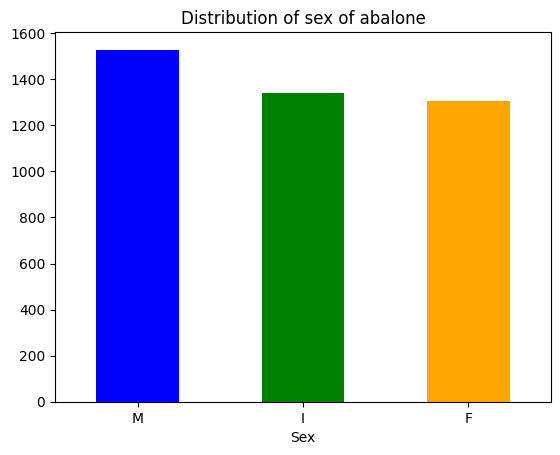

In [6]:
abalone_data["Sex"].value_counts().plot(kind = "bar", color = ["b", "g", "orange"])
plt.title("Distribution of sex of abalone")
plt.xticks(rotation = 0)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

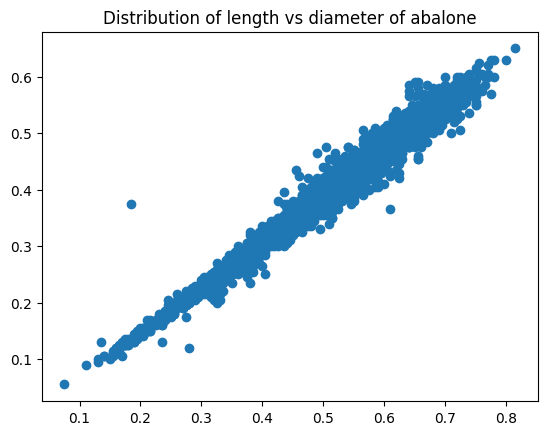

In [7]:
plt.scatter(abalone_data["Length"], abalone_data["Diameter"])
plt.title("Distribution of length vs diameter of abalone")
plt.xticks(rotation = 0)

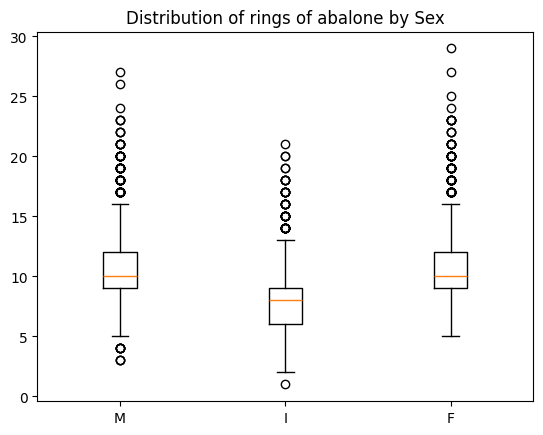

In [8]:
plt.boxplot(abalone_data[abalone_data["Sex"] == "M"]["Rings"], positions=[1], widths=0.2)

plt.boxplot(abalone_data[abalone_data["Sex"] == "I"]["Rings"], positions=[2], widths=0.2)

plt.boxplot(abalone_data[abalone_data["Sex"] == "F"]["Rings"], positions=[3], widths=0.2)

plt.xticks([1, 2, 3], ["M", "I", "F"])
plt.title("Distribution of rings of abalone by Sex")
plt.show()

In [9]:
grouped_df = abalone_data.groupby("Sex")

In [10]:
grouped_df

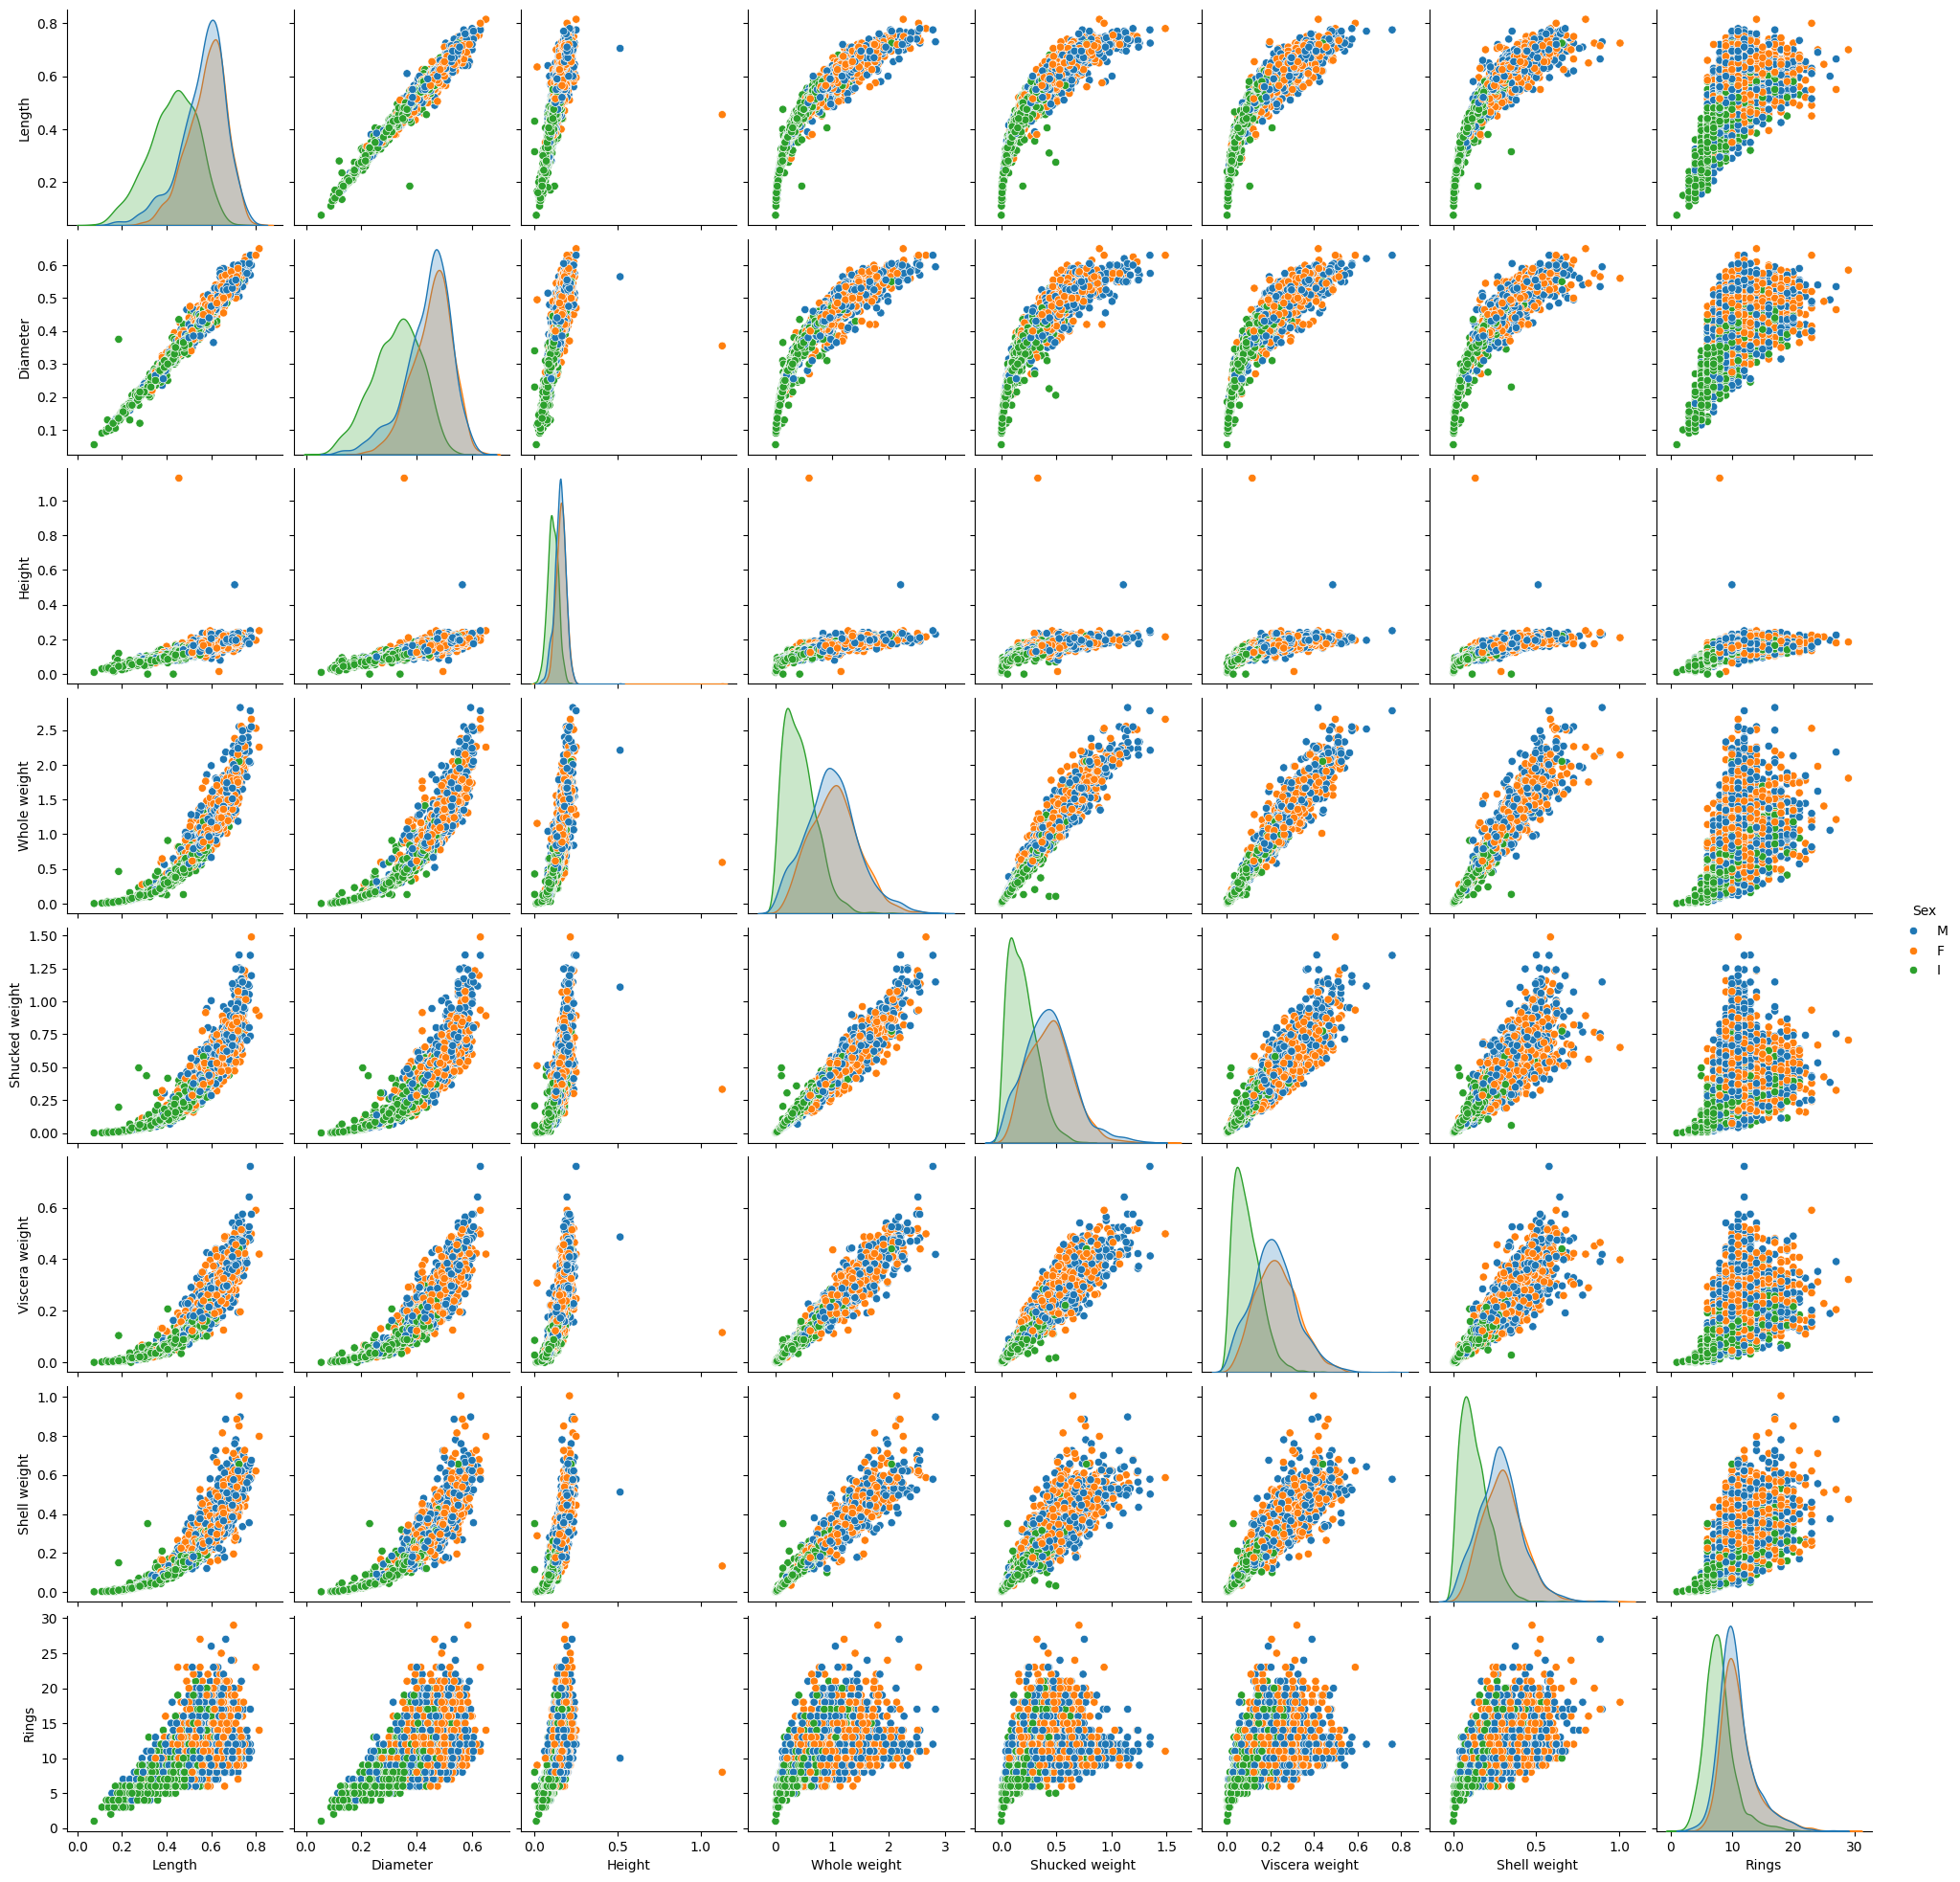

In [11]:
sns.pairplot(abalone_data, hue="Sex")

<Axes: >

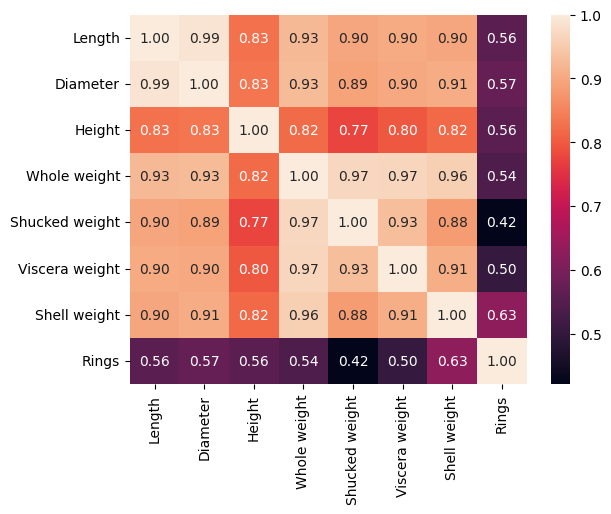

In [12]:
sns.heatmap(abalone_data.drop(["Sex"], axis = 1).corr(), annot=True, fmt=".2f")

In [13]:
one_hot_encoded_data = pd.get_dummies(abalone_data, columns=["Sex"], drop_first=True)

In [14]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Sex' column
abalone_data['Sex_enc'] = label_encoder.fit_transform(abalone_data['Sex'])

# Display the first few rows of the updated dataframe
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_enc
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [15]:
abalone_data.shape

(4177, 10)

In [16]:
y = abalone_data["Sex_enc"]

X = abalone_data.drop(["Sex", "Sex_enc"], axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
xgb_clf = XGBClassifier(objective="multi:softmax", random_state=42)

In [19]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [20]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [21]:
y_pred = xgb_clf.predict(X_test)

In [22]:
len(y_test)

836

In [23]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.39      0.41       262
           1       0.72      0.72      0.72       267
           2       0.46      0.50      0.47       307

    accuracy                           0.53       836
   macro avg       0.54      0.54      0.54       836
weighted avg       0.53      0.53      0.53       836



In [24]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[103  30 129]
 [ 23 192  52]
 [109  46 152]]


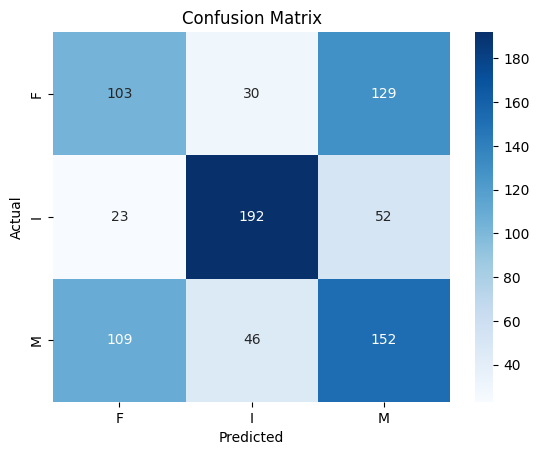

In [25]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Standard shap values

In [26]:
explainer = shap.TreeExplainer(xgb_clf)

In [35]:
explainer

In [49]:
X_test.shape

(836, 8)

In [44]:
shap_values = explainer(X_test)

In [45]:
shap_values[0]

.values =
array([[-0.10156806,  0.5696644 , -0.13736849],
       [ 0.09306458, -0.10304266, -0.05148196],
       [ 0.09709643, -0.24819824, -0.05373397],
       [ 0.26822692, -2.0737865 , -0.00455186],
       [-0.24012075,  0.29020387,  0.2997149 ],
       [ 0.5351948 , -1.7648333 , -0.11589566],
       [ 0.0037138 ,  0.00812215,  0.34000233],
       [ 0.1228026 , -0.4670942 ,  0.02193077]], dtype=float32)

.base_values =
array([0.468645  , 0.2802039 , 0.66968894], dtype=float32)

.data =
array([0.605 , 0.455 , 0.16  , 1.1035, 0.421 , 0.3015, 0.325 , 9.    ])

In [43]:
np.shape(shap_values[0])

(8, 3)

In [36]:
shap_values_exp_xtest = explainer(X_test)

In [42]:
shap.plots.waterfall(shap_values_exp_xtest[0])

TypeError: only length-1 arrays can be converted to Python scalars

In [28]:
np.shape(shap_values)

(836, 8, 3)

In [29]:
shap_values

array([[[-0.10156806,  0.5696644 , -0.13736849],
        [ 0.09306458, -0.10304266, -0.05148196],
        [ 0.09709643, -0.24819824, -0.05373397],
        ...,
        [ 0.5351948 , -1.7648333 , -0.11589566],
        [ 0.0037138 ,  0.00812215,  0.34000233],
        [ 0.1228026 , -0.4670942 ,  0.02193077]],

       [[-0.16428533,  0.80731386, -0.08543121],
        [ 0.04672043,  0.3733876 ,  0.01770791],
        [ 0.06807818, -0.01860568, -0.08759404],
        ...,
        [ 0.19425489, -0.18543129,  0.27582252],
        [-0.267642  ,  0.16385552, -0.03568859],
        [ 0.05516998, -0.03230696, -0.03935975]],

       [[-0.07183151,  0.11842209, -0.04304339],
        [-0.1844361 ,  0.02900209, -0.03591529],
        [ 0.24412833, -0.3402538 ,  0.27643305],
        ...,
        [ 0.12495489, -0.29495776,  0.2045125 ],
        [-0.08428328, -0.42816544,  0.17219274],
        [-0.08279522,  0.230047  ,  0.07140688]],

       ...,

       [[-0.0123429 ,  0.5831491 , -0.18701842],
        [-0

In [30]:
shap_values[0]

array([[-0.10156806,  0.5696644 , -0.13736849],
       [ 0.09306458, -0.10304266, -0.05148196],
       [ 0.09709643, -0.24819824, -0.05373397],
       [ 0.26822692, -2.0737865 , -0.00455186],
       [-0.24012075,  0.29020387,  0.2997149 ],
       [ 0.5351948 , -1.7648333 , -0.11589566],
       [ 0.0037138 ,  0.00812215,  0.34000233],
       [ 0.1228026 , -0.4670942 ,  0.02193077]], dtype=float32)

In [34]:
shap.plots.waterfall(explaination = shap_values[0])

TypeError: waterfall() got an unexpected keyword argument 'explaination'

In [34]:
explainer.expected_value

[np.float32(0.468645), np.float32(0.2802039), np.float32(0.66968894)]

In [32]:
shap.plots.force(explainer.expected_value[0], shap_values[0,:])

In [72]:
shap.force_plot(explainer.expected_value[0], shap_values[:1000, :])

IndexError: list index out of range

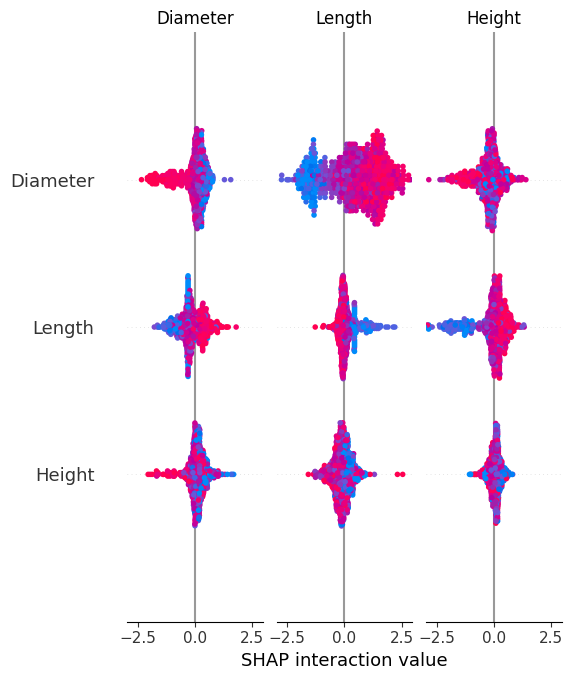

In [69]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

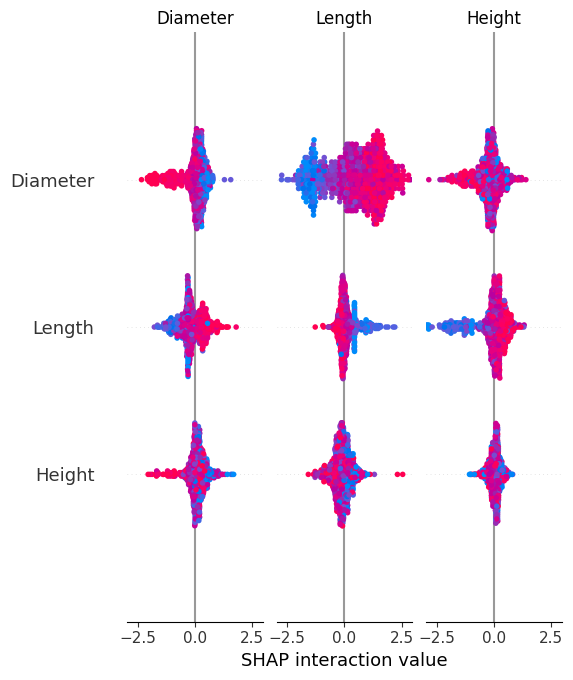

In [68]:
shap.summary_plot(shap_values, X_test)